# Optimisation du Portefeuille

"Modern Portfolio Theory" (MPT), une hypothèse avancée par Harry Markowitz dans son article "Portfolio Selection" (publié en 1952 par le Journal of Finance) est une théorie de l'investissement basée sur l'idée que les investisseurs peu enclins au risque peuvent construire des portefeuilles pour optimiser ou maximiser le rendement attendu en fonction d'un niveau de risque de marché donné, en soulignant que le risque est une partie inhérente à un rendement plus élevé. Il s'agit de l'une des théories économiques les plus importantes et les plus influentes en matière de finance et d'investissement.

[Plus d'informations sur la théorie moderne du Portefeuille](https://fr.wikipedia.org/wiki/Th%C3%A9orie_moderne_du_portefeuille)

## Simulation Monte Carlo pour la recherche d'optimisation


Nous pourrions essayer de trouver au hasard l'équilibre optimal du portefeuille en utilisant la simulation de Monte Carlo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import quandl

In [3]:
# Télécharger et obtenir les rendements quotidiens
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [4]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [5]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [6]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [7]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


# Simulation de milliers de répartitions possibles

In [8]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


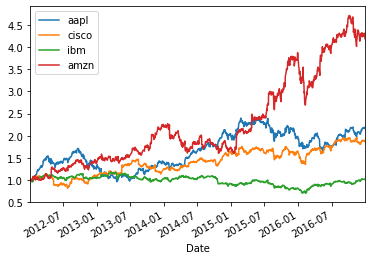

In [9]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [10]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


## Rendements logarithmiques vs. Rendements arithmétiques

Nous allons maintenant passer à l'utilisation de rendements logarithmiques au lieu de rendements arithmétiques, pour beaucoup de nos cas d'utilisation ce sont presque les mêmes, mais la plupart des analyses techniques nécessitent de normaliser les séries temporelles et l'utilisation de rendements logarithmiques est une bonne façon de le faire.
Les rendements logarithmiques sont pratiques à utiliser dans la plupart des algorithmes que nous rencontrerons.


Pour une analyse complète des raisons pour lesquelles nous utilisons les rendements logarithmiques, consultez [ce super article](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).


In [11]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


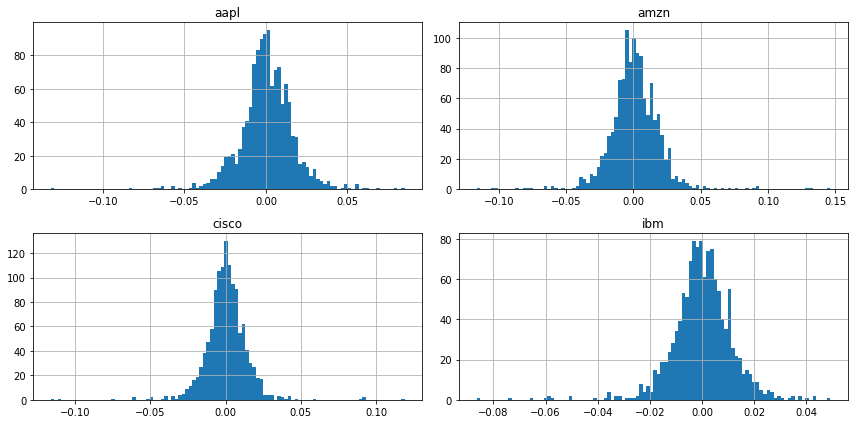

In [12]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [13]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [14]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [15]:
# Calculer la covariance des colonnes par paires
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [16]:
log_ret.cov()*252 # multiplier par les jours ouvrables

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


## Exécution pour une certaine répartition aléatoire

In [17]:
# Règlage du seed (optionnel)
np.random.seed(101)

# Colonnes d'actions (Stocks)
print('Stocks')
print(stocks.columns)
print('\n')

# Créer des poids aléatoires
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Re-pondération des Poids
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Rendement attendu ou escompté
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# variance attendue ou escomptée
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Ratio de Sharpe
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.1559927204963252


Expected Volatility
0.1850264956590895


Sharpe Ratio
0.8430831483926556


Super ! Maintenant, on peut l'éxécuter plein de fois !

In [18]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Créer des poids aléatoires
    weights = np.array(np.random.random(4))

    # (re)Pondération des poids
    weights = weights / np.sum(weights)
    
    # Sauvegarde des Poids
    all_weights[ind,:] = weights

    # rendement attendu
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # variance Attendue
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Ratio de Sharpe
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [19]:
sharpe_arr.max()

1.030326055127131

In [20]:
sharpe_arr.argmax()

1419

In [21]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [22]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

## Tracer les données

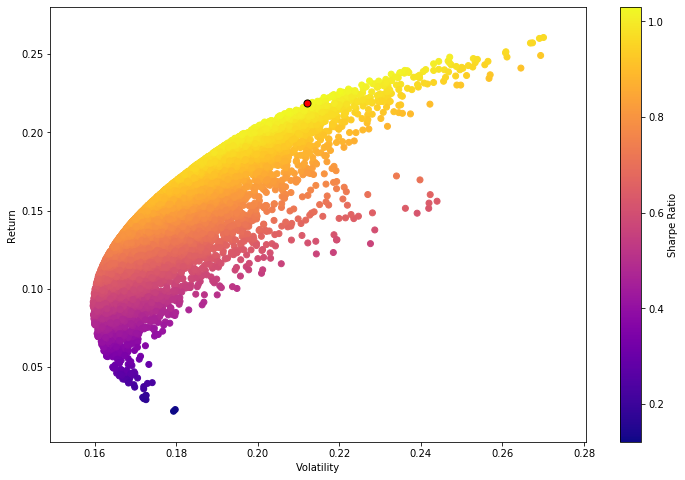

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Ajouter un point rouge pour le SR max
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Optimisation mathématique

Il y a de bien meilleures façons de trouver de bons poids de répartition que de simplement deviner et vérifier ! Nous pouvons utiliser des fonctions d'optimisation pour trouver les poids idéaux mathématiquement !

### Fonctionnaliser les opérations de rendement et de SR

In [24]:
def get_ret_vol_sr(weights):
    """
    Prends en argument les poids, retourne un tableau de rendement,
    volatilité et Ratio de Sharpe
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [25]:
from scipy.optimize import minimize

Pour bien comprendre tous les paramètres, regardez:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [26]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

L'optimisation fonctionne comme une fonction de minimisation, puisque nous voulons en fait maximiser le ratio de Sharpe, nous devrons le rendre négatif afin de pouvoir minimiser le sharpe négatif (comme pour maximiser le sharpe positif)

In [27]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [28]:
# Contraintes
def check_sum(weights):
    '''
    Retourne 0 si la somme des poids vaut 1.0
    '''
    return np.sum(weights) - 1

In [29]:
# Par convention de fonction de minimisation, il devrait s'agir d'une fonction qui retourne zéro pour certaines conditions
cons = ({'type':'eq','fun': check_sum})

In [30]:
# 0-1 pour chaque poids
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [31]:
# Hypothèse initiale (répartition égale)
init_guess = [0.25,0.25,0.25,0.25]

In [32]:
# Sequential Least Squares Programming (SLSQP)
# Programmation séquentielle des moindres carrés
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [33]:
opt_results

     fun: -1.0307168703356593
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921728e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628976, 0.20418983, 0.        , 0.52952041])

In [34]:
opt_results.x

array([0.26628976, 0.20418983, 0.        , 0.52952041])

In [35]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

# Portefeuilles Optimaux (Frontière Efficiente)

La frontière efficiente est l'ensemble des portefeuilles optimaux qui offrent le rendement attendu le plus élevé pour un niveau de risque défini ou le risque le plus faible pour un niveau de rendement attendu donné. Les portefeuilles qui se situent sous la frontière efficiente sont sous-optimaux, car ils n'offrent pas un rendement suffisant pour le niveau de risque. Les portefeuilles qui se regroupent à droite de la frontière efficiente sont également sous-optimaux, car ils présentent un niveau de risque plus élevé pour le taux de rendement défini.

En résumé, la frontière efficiente est composée de l'ensemble des portefeuilles (combinaisons de titres) qui présentent la meilleure rentabilité pour un niveau de risque donné.

Frontière Efficiente https://epargne.ooreka.fr/astuce/voir/678865/frontiere-efficiente

In [36]:
# Nos rendements vont de 0 à 0.3
# Créer un nombre de points linéairement espacés pour calculer x dessus
frontier_y = np.linspace(0,0.3,100) # Changez 100 à un chiffre inférieur pour les ordinateurs plus lents !

In [37]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [38]:
frontier_volatility = []

for possible_return in frontier_y:
    # contraintes
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

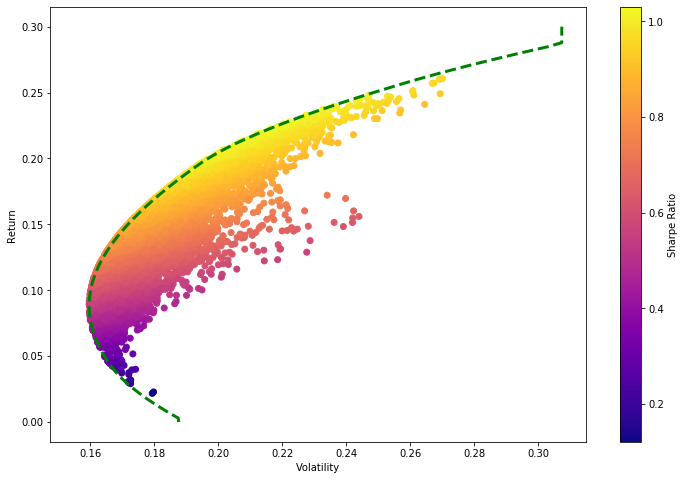

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Ajouter une ligne de frontière
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Bon Travail!